Hypothesis Testing with Insurance Data (Core)
For this assignment, we will be working with the US Health Insurance Dataset from Kaggle.

We have been asked to use our hypothesis testing skills to answer the following questions:

- Q1. Do smokers have higher insurance charges than non-smokers?
- Q2. Are men more likely to smoke than women?
- Q3. Do different regions have different charges, on average?

For each question, make sure to:

State your Null Hypothesis and Alternative Hypothesis

Select the correct test according to the data type and number of samples

Test the assumptions of your selected test.

Execute the selected test, or the alternative test (if you do not meet the assumptions)

Interpret your p-value and reject or fail to reject your null hypothesis 

Show a supporting visualization that helps display the result

Imports

In [3]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

Load and filter Data

In [27]:
df = pd.read_csv("insurance.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Q1. Do smokers have higher insurance charges than non-smokers?

Hypothesis :
null hypothesis:Smokers and non smokers have the same charges(there is no statistical  difference in the charges of smokers and non smokers
Alternative hypotheis : Smokers and non smokers have different charges(there is a statistical  difference in the charges of smokers and non smokers.
Alpha: We will be using an alpha=.05

In [ ]:
#group per status Smoking status , let's use a more realistic sample size of 100

In [8]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [10]:
sample = df.sample(n=100,random_state=42)
smoker_charges = sample.loc[ sample['smoker']=='yes',"charges"]
non_smoker_charges = sample.loc[ sample['smoker']=='no',"charges"]
## Getting means for smoker status charges
print(f"For smokers (n={len(smoker_charges)}): Mean={np.mean(smoker_charges):.2f}")
print(f"For non smokers (n={len(non_smoker_charges)}): Mean={np.mean(non_smoker_charges):.2f}")

For smokers (n=22): Mean=32997.31
For non smokers (n=78): Mean=8394.54


In [ ]:
#we can see above that there are two groups. 
#There are 22 smokers with average charges of 32997.31 and 78 non smnokers  with average charges of 8394.54

Let's visualize the results when our sample size is 100

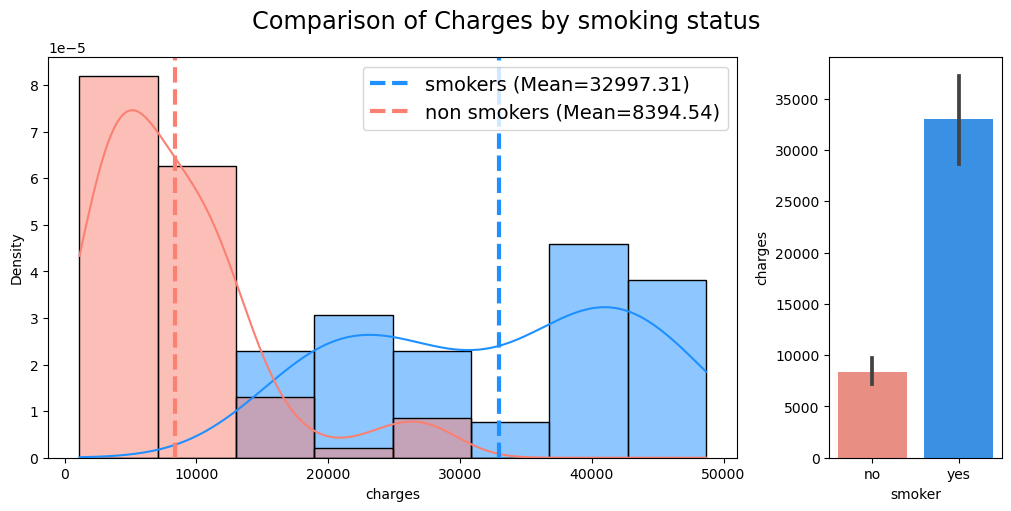

In [12]:
smokests_palette={'yes':'dodgerblue', "no":'salmon'}
## Visualizing Sample means
fig, (ax,ax_bar) = plt.subplots(figsize= (10,5), ncols=2, 
                                constrained_layout=True,
                                gridspec_kw={'width_ratios':[0.8,0.2]})


# Histogram
ax = sns.histplot(data=sample, x='charges',fill=True,hue='smoker',kde=True,
                  stat='density',common_norm=False,ax=ax,
                  palette=smokests_palette)

ax.axvline(np.mean(smoker_charges), ls='--',lw=3, 
           label=f"smokers (Mean={np.mean(smoker_charges):.2f})",color=smokests_palette['yes'])

ax.axvline(np.mean(non_smoker_charges), ls='--', lw=3, 
           label=f"non smokers (Mean={np.mean(non_smoker_charges):.2f})",color=smokests_palette['no'])

ax.legend(prop={"size":14}, loc='upper right')#bbox_to_anchor=[1,1])
## Barplot
sns.barplot(data=sample, x='smoker',y='charges',ax = ax_bar,palette=smokests_palette)
fig.suptitle('Comparison of Charges by smoking status',fontsize='xx-large');

In [ ]:
#The means are very different, smokers have higher charges mean ,but we will use the t-test to determine if this difference is
#statistically significant or if it is just due to randomness in our samples.

Test Assumptions
Independent T-Test Assumptions:(No significant outliers,Normality,Equal Variance )

Testing for Outliers

In [13]:
zscores_f = stats.zscore(smoker_charges)
outliers_f = abs(zscores_f)>3
np.sum(outliers_f)

0

In [14]:
zscores_n = stats.zscore(non_smoker_charges)
outliers_n = abs(zscores_n)>3
np.sum(outliers_n)

2

In [19]:
#remove outliers in non smokers
non_smoker_charges = non_smoker_charges[(np.abs(stats.zscore(non_smoker_charges)) < 3)]

In [20]:
zscores_x = stats.zscore(non_smoker_charges)
outliers_x = abs(zscores_x)>3
np.sum(outliers_x)

0

Test Each Group for Normality

In [21]:
# normal test smokers
result_s = stats.normaltest(smoker_charges)
result_s

NormaltestResult(statistic=8.481188655372003, pvalue=0.014399031556451041)

In [ ]:
#p_value is < 0.05 so this is not normally distributed, but we will continue becuase the sample size is greater than 15

In [22]:
# normal test nonsmokers
result_non = stats.normaltest(non_smoker_charges)
result_non

NormaltestResult(statistic=4.011538559343466, pvalue=0.1345567441026122)

In [ ]:
#2nd group the p-value is greater than 0.05,  this one is a normal distribution.

Testing for Equal Variance with Levene's test
null hypothesis is: All samples are from populations with equal variances.  

In [24]:
result = stats.levene(non_smoker_charges,smoker_charges)
result

LeveneResult(statistic=52.55139101636291, pvalue=1.2139255409014474e-10)

Since our p-value is way<0.05, we reject the null hypothesis that the samples come from populations with equal variances. Therefore, we accept that our groups DO NOT have equal variance, 
#and we have NOT met the assumption of homogeneity of variances.
but that won't stop us! We just need to be sure to include "equal_var = False" when we perform our t-test.

Perform and evaluate the t-test


In [25]:
# Independent t-test with equal_var set to False
ind_result = stats.ttest_ind(smoker_charges, non_smoker_charges, equal_var = False)
ind_result

Ttest_indResult(statistic=11.441281148432447, pvalue=5.6151366040908574e-11)

In [26]:
## is our result significant
print(f"p-value={ind_result.pvalue:.10f}")
print(f"Significant: {ind_result.pvalue <.05}")

p-value=0.0000000001
Significant: True


Based on our t-test, we have a significant result. (p < 0.05) means we reject the null hypothesis and accept the alternative hypothesis.  In this case, this means that there IS a difference between the charges of smokers and non smokers.

In conclusion smokers had a significantly higher charges.(See the comparison graphs above)

Question2 - Q2. Are men more likely to smoke than women?

Hypothesis :
null hypothesis: men and women smokers have the same lileyhood of smoking(there is no statistical  difference in the likelyhood of smoking between men and women

Alternative hypotheis : men and women have different likeyhood of smoking (there is a statistical  difference in the likelyhood of smoking between men and women

Alpha: We will be using an alpha=.05

In [28]:
df['sex'].value_counts()


male      676
female    662
Name: sex, dtype: int64

In [ ]:
#First, let's visualize smoking status  by sex.

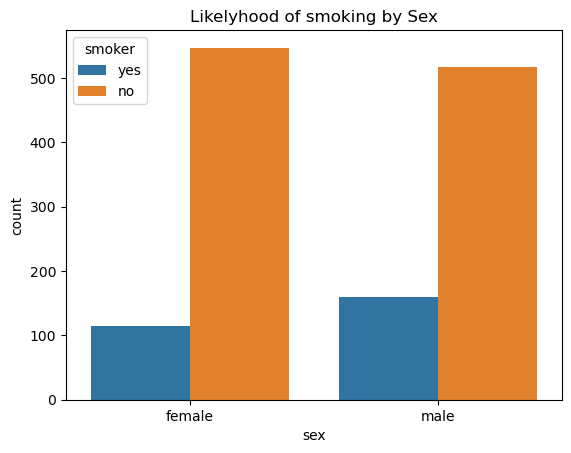

In [29]:
ax = sns.countplot(data=df, x='sex',hue='smoker',)
ax.set_title("Likelyhood of smoking by Sex");

Getting the Contingency Table with pd.crosstab

In [31]:
# calculate the contingency table with pd.cross-tab
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


In [32]:
# Run the Test and Save the Output
resultss = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = resultss #this labels the results

In [33]:
# What was our p-value?
print(p)
p<.05

0.006548143503580696


True

The p-value is less than 0.05 so we have a significant result.

Since our p < .05, we reject the null hypothesis that there is no relationship between a passenger's sex and the likelyhood of smoking.

This means we accept the alternate that there is a signifacance dirffrent in sex and likelyhood of smoking.
In conclusion , men are more likely to smoke than women.